# Case Study - 9

# Unsupervised Learning

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Read the dataset to the python environment.

In [2]:
#read the dataset
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# checking the columns and type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
# checking null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There is no missing values.Dataset is clear.

In [6]:
# checking the shape of dataframe,no of rows and columns
data.shape

(178, 13)

In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


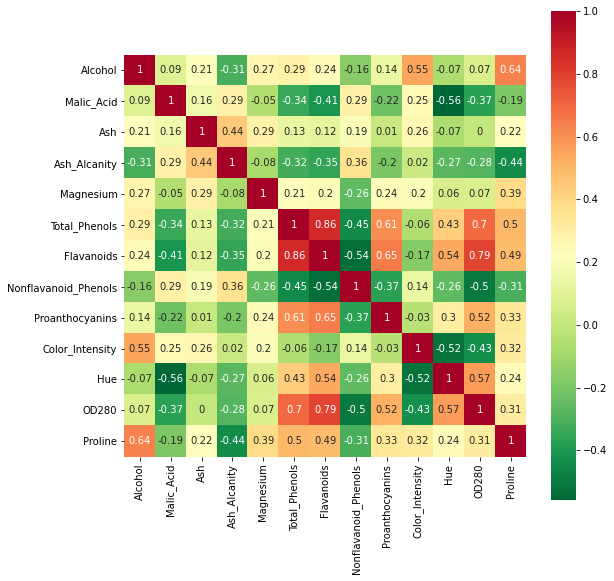

In [8]:
# Correlation Heatmap
correlation = data.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()


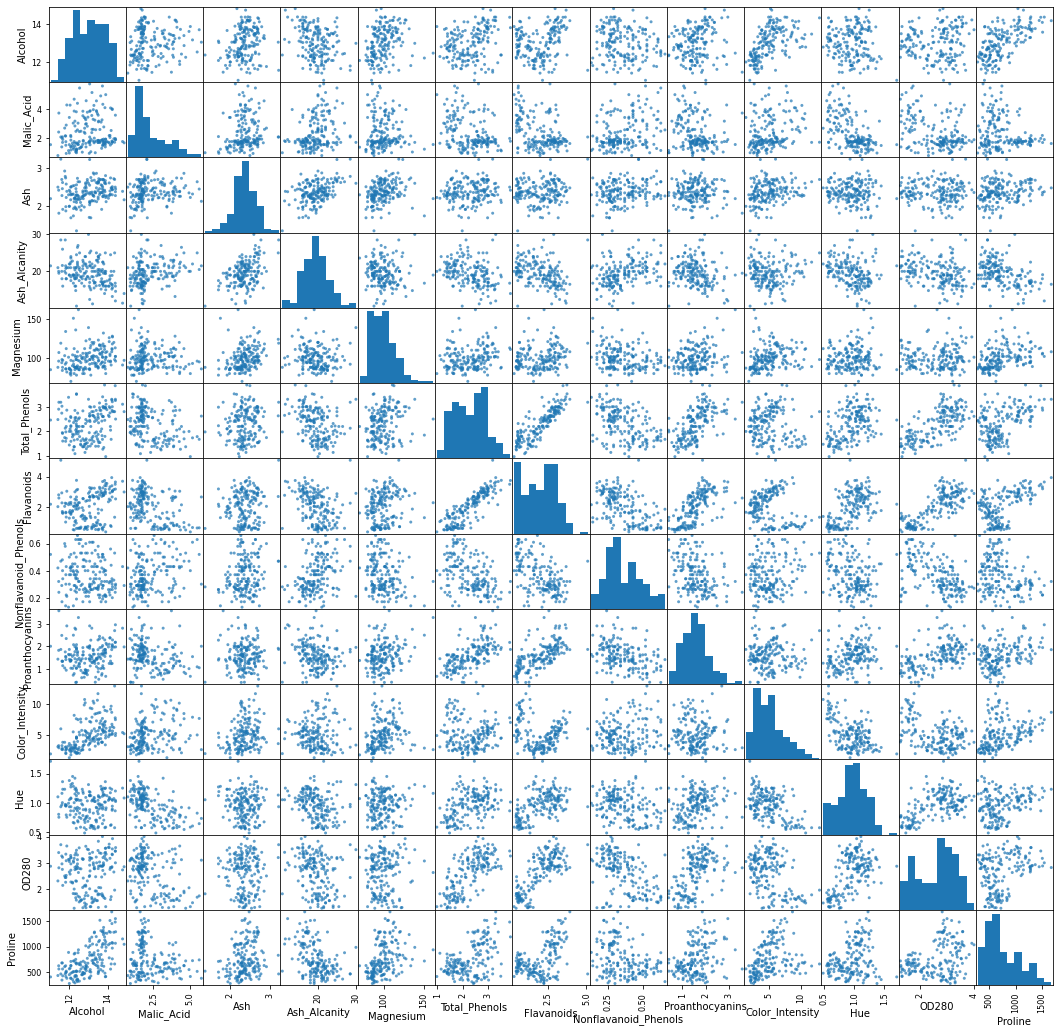

In [9]:
# Scatter plot
from pandas.plotting import scatter_matrix as sm
sm(data, alpha = 0.7, figsize = (18,18))
plt.show()

In [11]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data.iloc[:,1:])

In [12]:
#Clustering Kmeans
from sklearn.cluster import KMeans
seed = 0
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=seed)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

[2135.9999999999986, 1481.5532842310736, 1187.6478618678148, 1099.1084675248303, 1032.318728263122, 971.438344070887, 909.6481312957616, 858.5178973557587, 822.2141072659541, 798.4427510321202]


In [13]:
# Building K-Means Model
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
pred=model_kmeans.labels_
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In the above output we got value labels: ‘0’, ‘1’ and ‘2’. For a better understanding, we can visualize these clusters.

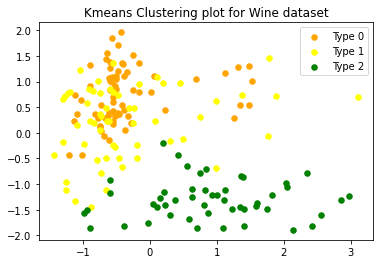

In [14]:
plt.scatter(scaled_data[pred == 0, 0], scaled_data[pred == 0, 10], s = 30, c = 'orange', label = 'Type 0')
plt.scatter(scaled_data[pred == 1, 0], scaled_data[pred == 1, 10], s = 30, c = 'yellow', label = 'Type 1')
plt.scatter(scaled_data[pred == 2, 0], scaled_data[pred == 2, 10], s = 30, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

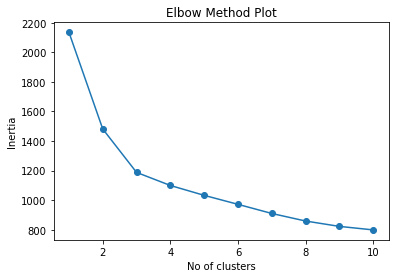

In [15]:
#Elbow Method
plt.plot(ks,inertia,'-o')
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

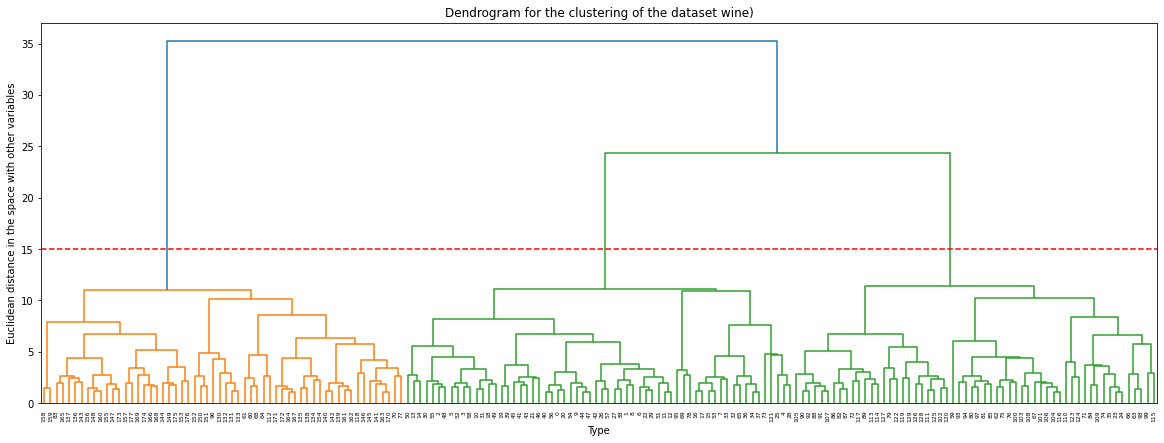

In [16]:
#Implementing hierarchical Dendrogram plot clustering
from scipy.cluster.hierarchy import linkage,dendrogram

dendro = linkage(scaled_data,method = 'ward')
plt.figure(figsize=(20,7))
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(15,0,3000,colors="red",linestyles="dashed")
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

The longest line of dendrogram cuts three lines, thus the optimum number of cluster is 3

In [21]:
#Building an Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
pred1=cluster.fit_predict(scaled_data)
pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2,
       0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In the above output we got value labels: ‘0’, ‘1’ and ‘2’. For a better understanding, we can visualize these clusters.

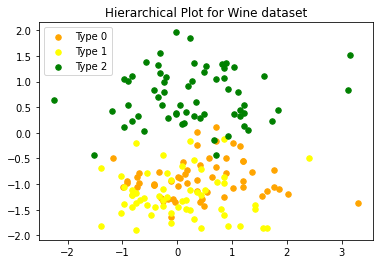

In [20]:
# Plotting Hierarchical cluster plot for Wine dataset

plt.scatter(scaled_data[pred1 == 0, 9], scaled_data[pred1 == 0, 8], s = 30, c = 'orange', label = 'Type 0')
plt.scatter(scaled_data[pred1 == 1, 3], scaled_data[pred1 == 1, 10], s = 30, c = 'yellow', label = 'Type 1')
plt.scatter(scaled_data[pred1 == 2, 1], scaled_data[pred1 == 2, 10], s = 30, c = 'green', label = 'Type 2')
plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

In [24]:
#PCA for feature reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data)
x_pca = pca.transform(data)
x_pca.shape

(178, 2)

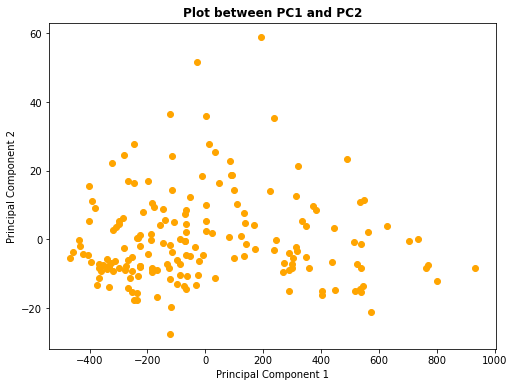

In [26]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:,0],x_pca[:,1],color='orange')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Plot between PC1 and PC2',fontweight='bold')
plt.show()